# Rise of Responsible Investing: ESG

Environmental, Social and Governance (ESG) Criteria is a set of standards for a company’s operations that socially conscious investors use to screen potential investments. Environmental criteria look at how a company performs as a steward of the natural environment. Social criteria examine how a company manages relationships with its employees, suppliers, customers and the communities where it operates. Governance deals with a company’s leadership, executive pay, audits, internal controls and shareholder rights.


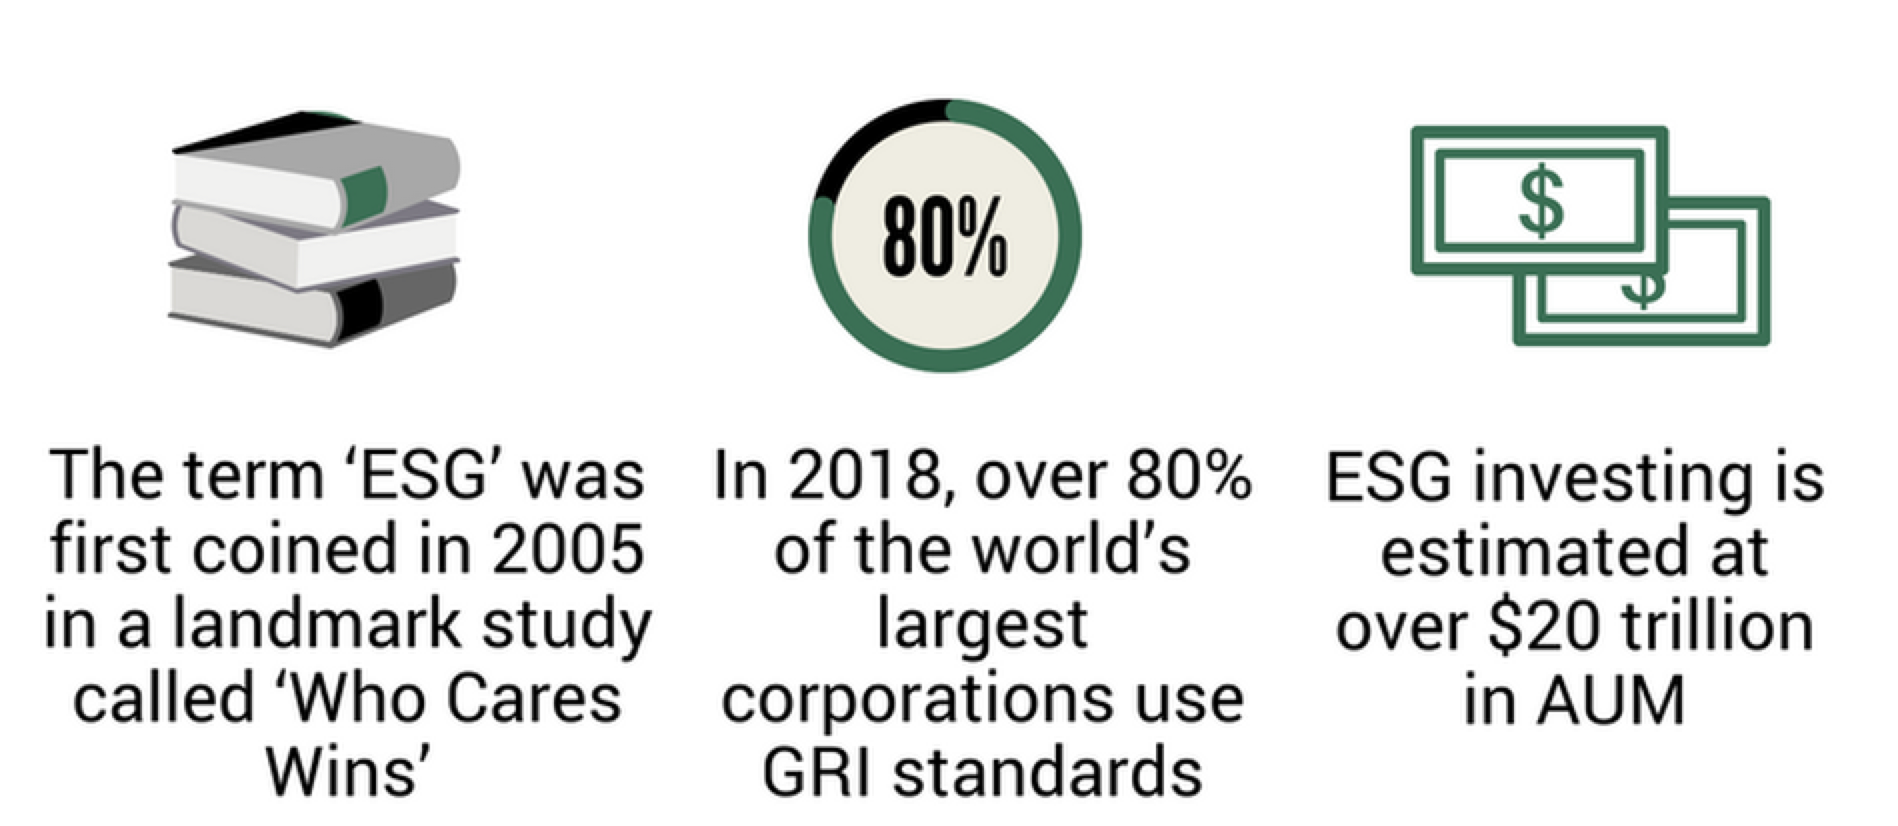

In [16]:
Image(filename = '/Users/pritimishall/Documents/DataScience/ds-skills-72418-lecture-notes-master/midterm/ESG_2.png')

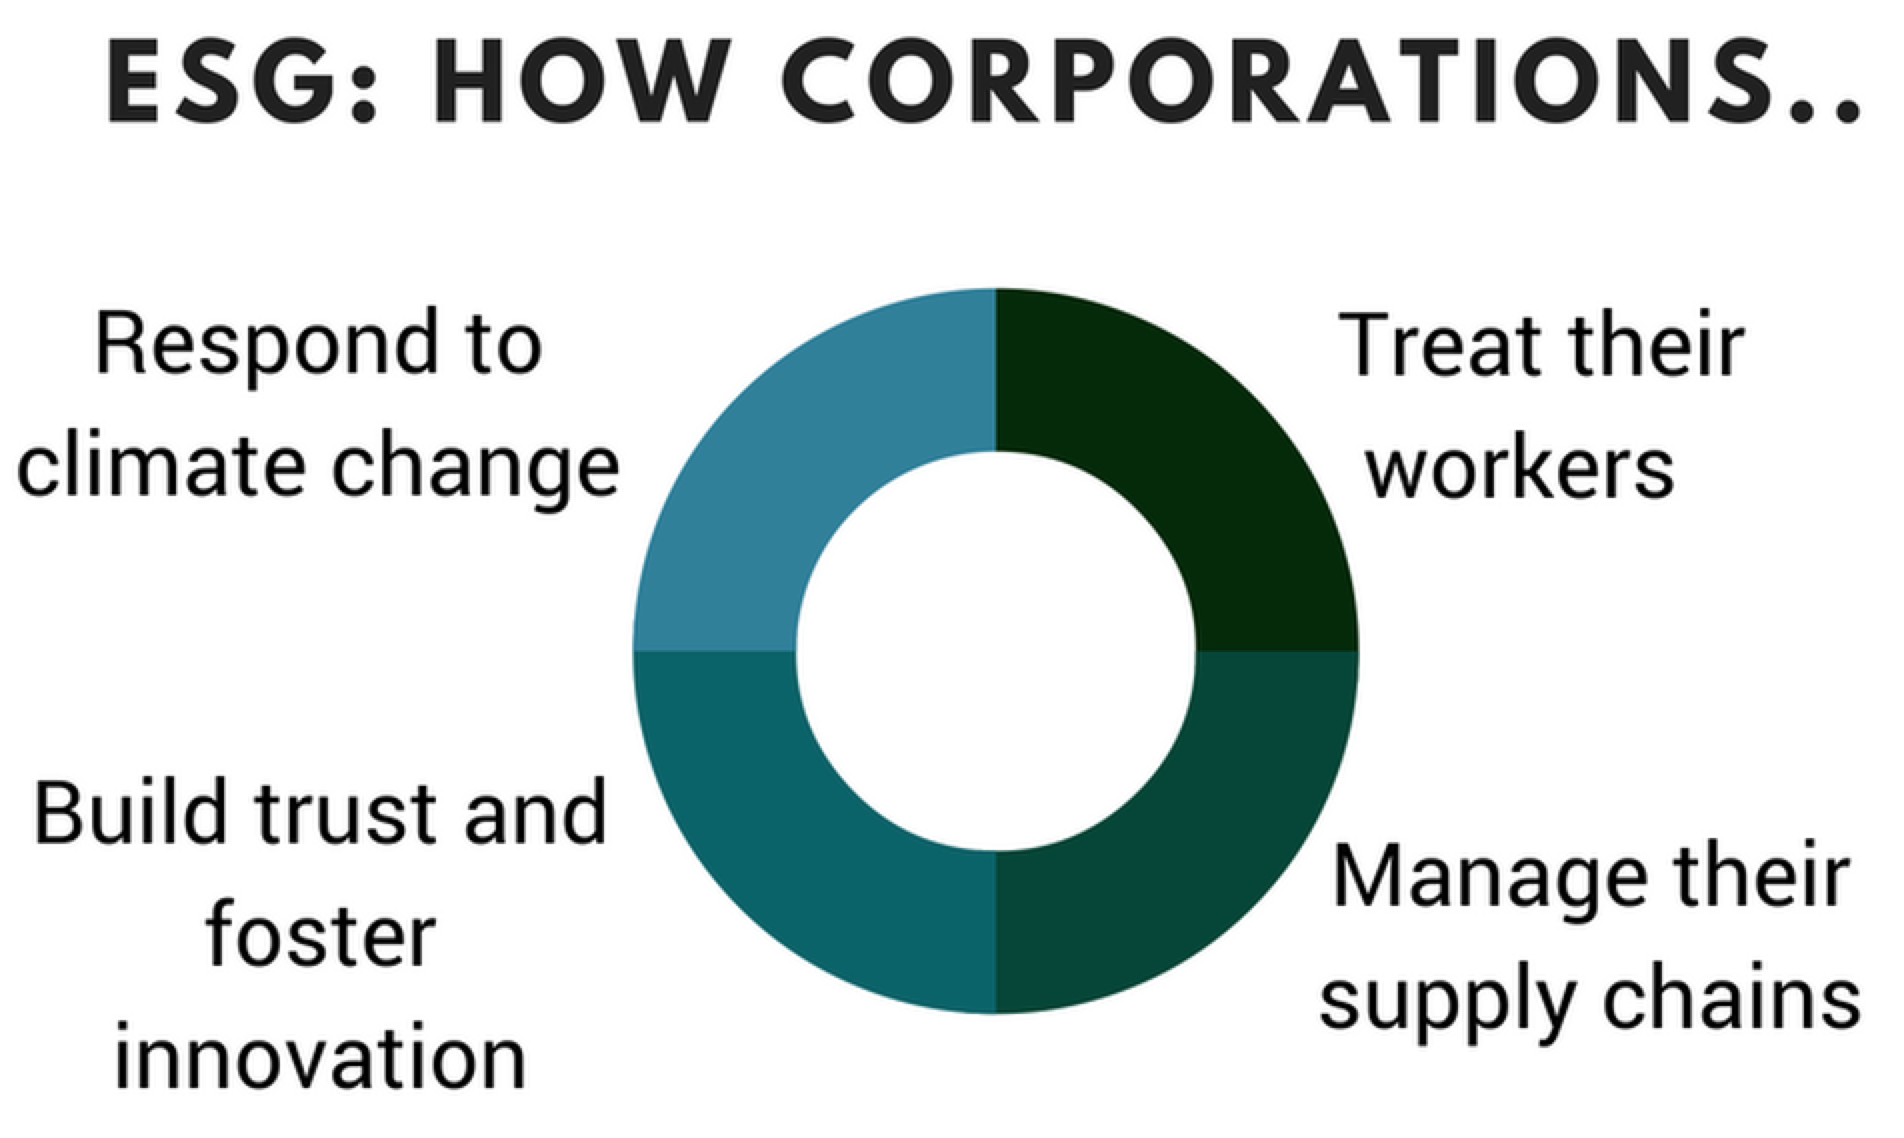

In [14]:
Image(filename = '/Users/pritimishall/Documents/DataScience/ds-skills-72418-lecture-notes-master/midterm/ESG_1.png')

Project attempts to assess what are the key contributing factors that influence the ESG scores for the US Large Cap Equity securities.

### Hypothesis: Does the Sustainability matter for Institutional Investors?

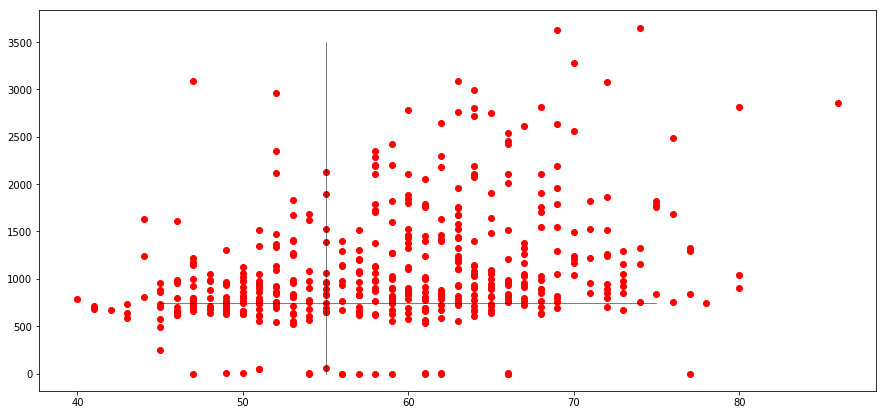

In [26]:
plotInstitutionHoldingChart(companies_clean_info)

### Answer: Yes. Institutional interests increases as the sustainability score increases.

### Hypothesis: Does the insider holders percentage influence Sustainability score?

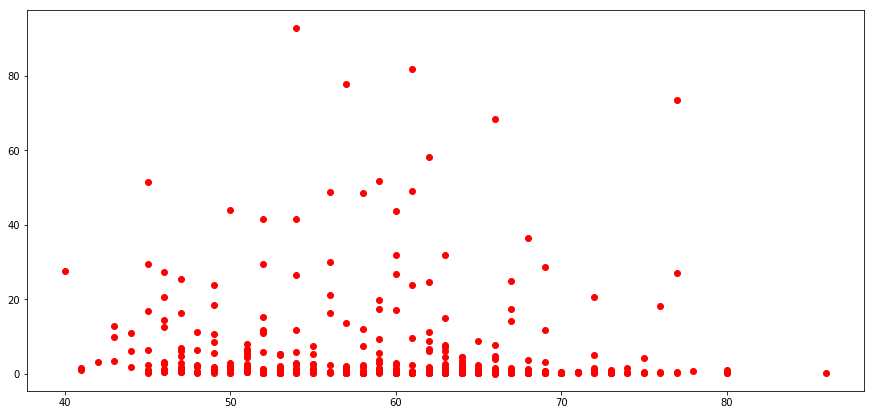

In [23]:
plotInsiderHoldingChart(companies_clean_info)

### Answer: No. These are large cap companies. Hence they have limited insider holders. Hence insider holders do not have much influence on Sustainability score.

### Hypothesis: Does the type of industry (Division) matter?

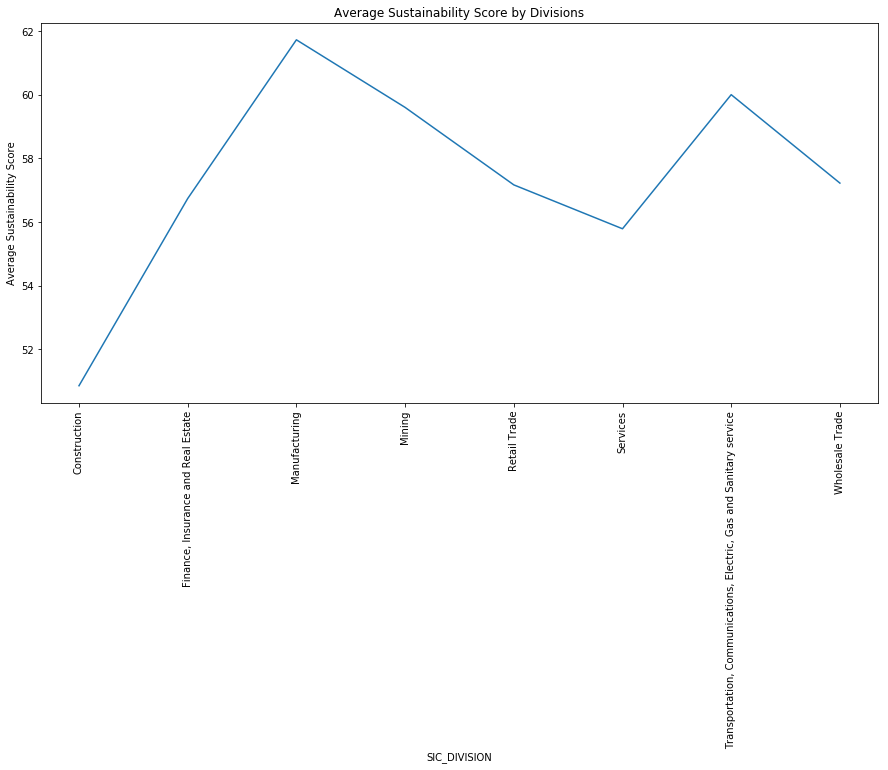

In [29]:
plotAvgSustainabilitybyDivision(companies_clean_info)

### Answer: Yes. Companies belonging to Manufacturing and Transportation, Communications, Electric, Gas and Sanitary service are clearly having higher Sustainability scores whereas Construction and Services companies have low Sustainability scores.

## Conclusion:

### 1. There is clear interest in Sustainability from Institutional investors. Companies that have higher score, will attract more institutional investors.

### 2. There are variations in the Sustainability performance by Industries. Manufacturing and Transportation, Communications, Electric, Gas and Sanitary service are leading with higher Sustainability scores whereas Construction and Services companies are lagging.

### 3. Further analysis needs to be performed to understand what other elements drive the Sustainability.

## Code Starts here:

In [1]:
import requests
import pandas as pd
from bs4 import BeautifulSoup

import plotly.offline as p
import plotly.graph_objs as go

import matplotlib.pyplot as plt
import numpy as np

import json

p.init_notebook_mode(connected=True)
from IPython.display import Image

In [2]:
"""Setting all the URLs for scraping data"""
url_key_statistics = "https://finance.yahoo.com/quote/TSLA/key-statistics"
url_holders = "https://finance.yahoo.com/quote/TSLA/holders"
url_sustainability = "https://finance.yahoo.com/quote/TSLA/sustainability"
url_SnP_Wiki = "https://en.wikipedia.org/wiki/List_of_S%26P_500_companies"
url_SIC_Range_Wiki = "https://en.wikipedia.org/wiki/Standard_Industrial_Classification"
url_edgar_company_api = "http://datafied.api.edgar-online.com/v2/companies?primarysymbols="
edgar_app_key = "ubkhn2ar6ck4m7fhvhp9gqp2"



### Utility Functions

In [3]:
def getBeatifulResponse(url):
    """Function that gets the response using the URL"""
    
    response = requests.get(url)
    beautsoup_object = BeautifulSoup(response.text, 'html.parser')
#     print(beautsoup_object.prettify())
    return beautsoup_object

In [4]:
def getSnPCompanies(url):
    """Function that scrapes the list of S&P 500 companies from Wikipedia"""
    
    bsoupobj = getBeatifulResponse(url)
    table = bsoupobj.find('table', {'class': 'wikitable sortable'})
    companies = []
    for row in table.findAll('tr')[1:]:
        ticker = row.findAll('td')[0].text.replace('.','-')
        company_name = row.findAll('td')[1].text
        companies.append([ticker,company_name])
    return companies

In [5]:
def getSustainabilityScore(url):
    """Function that scrapes Sustainability score from Yahoo Finance
    It calls getBeatifulResponse function to get response"""
    
    score = 0
    try:
        bsoupobj = getBeatifulResponse(url)
        score = int(bsoupobj.find_all('div', class_ = "Fz(36px)", attrs={"data-reactid": "20"})[0].text)
    finally:
        return score
    

In [6]:
def getHolders(url):
    """Function that scrapes list of holders from Yahoo Finance.
    It calls getBeatifulResponse function to get response"""
    
    bsoupobj = getBeatifulResponse(url)
    table = bsoupobj.find_all('td', {'class': 'Py(10px) Va(m) Fw(b) W(15%)'})
    holders = []
    try:
        for row in table:
            holder = row.text
            holders.append(holder)
    finally:
        return holders

In [7]:
def getIndustry(company_ticker):
    """Function that scrapes the Industry for a company using Edgar API"""
    
    industry = {}
    try:   
        response = requests.get(url_edgar_company_api + company_ticker + "&appkey=" + edgar_app_key)
        edgar_json = json.loads(response.text)

        industry['SIC_CODE'] = edgar_json['result']['rows'][0]['values'][-2]['value']
        industry['SIC_DESC'] = edgar_json['result']['rows'][0]['values'][-1]['value']
    finally:
        return industry

In [8]:
def getSICRangeLookup(url):
    """Function that scrapes the range of sic codes and corresponding 
    divisions from Wikipedia to create SIC Range lookups"""
    bsoupobj = getBeatifulResponse(url)
    table = bsoupobj.find('table', {'class': 'wikitable sortable'})
    range_sic_codes = []
                                    
    for row in table.findAll('tr')[1:]:
        range_sic_code = row.findAll('td')[0].text.replace('\n','')
        division = row.findAll('td')[1].text.replace('\n','')
        range_min = int(range_sic_code[0:4])
        range_max = int(range_sic_code[5:9])
        range_sic_codes.append([division, range_min, range_max])
    
    return(range_sic_codes)

In [9]:
def getIndustryDivision(sic_code):
    """Functions looks up the SIC code to provide correpsonding Division"""
#     print(SIC_Range)
    for division in SIC_Range:
        if sic_code >= division[1] and sic_code <= division[2]:
            return division[0]

In [10]:
def plotInsiderHoldingChart(companies_clean_info):
    """Chart plotting Sustainability scores against insider holdings"""

    fig, ax = plt.subplots(figsize=(15,7))
    sustainability_scores = [company.get('SUSTAINABILITY_SCORE') for company in companies_clean_info]
    insider_holders = [company.get('INSIDER_HOLDERS_PCT') for company in companies_clean_info]
    plt.plot(sustainability_scores, insider_holders, 'ro')

In [11]:
def plotAvgSustainabilitybyDivision(companies_clean_info):
    """Chart plotting Average Sustainability scores for company divisions"""

    fig, ax = plt.subplots(figsize=(15,7))
    df_company_clean_info.groupby('SIC_DIVISION')['SUSTAINABILITY_SCORE'].mean().plot(ax=ax)
    plt.xticks(np.arange(len(df_company_clean_info.groupby('SIC_DIVISION')['SUSTAINABILITY_SCORE'].mean())),df_company_clean_info.groupby('SIC_DIVISION')['SUSTAINABILITY_SCORE'].mean().keys(), rotation=90)
    plt.ylabel('Average Sustainability Score')
    plt.title('Average Sustainability Score by Divisions')

In [30]:
def plotInstitutionHoldingChart(companies_clean_info):
    """Chart plotting Sustainability scores against institution holdings"""
    
    fig, ax = plt.subplots(figsize=(15,7))
    sustainability_scores = [company.get('SUSTAINABILITY_SCORE') for company in companies_clean_info]
    institution_holders = [company.get('INSTITUTION_HOLDERS_NO') for company in companies_clean_info]
    plt.plot(sustainability_scores, institution_holders, 'ro')
    plt.plot([55, 55], [0, 3500], 'k-', lw=0.5)
    plt.plot([45, 75], [750, 750], 'k-', lw=0.5)

### Main body that scrapes the data, processes it and then analyses it

In [13]:
"""Scrape S&P 500 companies using Wikipedia"""
companies = getSnPCompanies(url_SnP_Wiki)

In [20]:
"""Scrape data from Yahoo Finance, EDGAR and Wikipedia and create master dataset"""
companies_info = []
companies_clean_info = []
SIC_Range = getSICRangeLookup(url_SIC_Range_Wiki)

for company in companies[0:500]:
    url_key_statistics = "https://finance.yahoo.com/quote/" + company[0] + "/key-statistics"
    url_sustainability = "https://finance.yahoo.com/quote/" + company[0] + "/sustainability"
    url_holders = "https://finance.yahoo.com/quote/"        + company[0] + "/holders"
    sustainability = getSustainabilityScore(url_sustainability)
    holders = getHolders(url_holders)
    industry = getIndustry(company[0])
    
#     print(industry)

    company_stats ={}
    company_stats['TICKER'] = company[0]
    company_stats['COMPANY_NAME'] = company[1]
    company_stats['SUSTAINABILITY_SCORE'] = sustainability
    company_stats['INSIDER_HOLDERS_PCT'] = float(holders[0].replace('%','')) if holders[0] != 'N/A' else None
    company_stats['INSTITUTION_HOLDERS_PCT'] = float(holders[1].replace('%','')) if holders[1] != 'N/A' else None
    company_stats['INSTITUTION_FLOAT_HOLDERS_PCT'] = float(holders[2].replace('%','')) if holders[2] != 'N/A' else None
    company_stats['INSTITUTION_HOLDERS_NO'] =  int(holders[3].replace(',','')) if holders[3] != 'N/A' else None
    company_stats['SIC_CODE'] = industry.get('SIC_CODE')
    company_stats['SIC_DESC'] = industry.get('SIC_DESC') 
    company_stats['SIC_DIVISION'] = getIndustryDivision(int(industry.get('SIC_CODE')))  if industry.get('SIC_CODE') is not None else None
    
    companies_info.append(company_stats)
#     print (company_stats)
#     print(companies)
    if len(companies_info) == 1:
        print('Scraping data', end="")
    print('.', end="")
print('Completed!')

Scraping data....................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................Completed!


In [21]:
"""Clean data - remove companies not having sustainability score"""
for company in companies_info:
    if company.get('SUSTAINABILITY_SCORE') != 0:
        companies_clean_info.append(company)
companies_clean_info

"""Create DataFrame"""
df_company_clean_info = pd.DataFrame(companies_clean_info)


### Reference: Complate dataset

In [27]:
df_company_clean_info

,COMPANY_NAME,INSIDER_HOLDERS_PCT,INSTITUTION_FLOAT_HOLDERS_PCT,INSTITUTION_HOLDERS_NO,INSTITUTION_HOLDERS_PCT,SIC_CODE,SIC_DESC,SIC_DIVISION,SUSTAINABILITY_SCORE,TICKER
0,3M Company,7.74,11.29,2.0,10.42,3841,Surgical and Medical Instruments and Apparatus,Manufacturing,66,MMM
1,Abbott Laboratories,0.72,75.07,2194.0,74.53,2834,Pharmaceutical Preparations,Manufacturing,64,ABT
2,AbbVie Inc.,0.09,71.60,2458.0,71.54,2834,Pharmaceutical Preparations,Manufacturing,66,ABBV
3,Accenture plc,0.21,73.86,1777.0,73.71,7389,"Services-Business Services, Not Elsewhere Clas...",Services,75,ACN
4,Activision Blizzard,6.00,95.52,1215.0,89.79,7372,Services-Prepackaged Software,Services,47,ATVI
5,Adobe Systems Inc,0.31,87.56,1786.0,87.29,7372,Services-Prepackaged Software,Services,69,ADBE
6,Advance Auto Parts,0.29,103.58,632.0,103.28,5531,Retail-Auto and Home Supply Stores,Retail Trade,49,AAP
7,AES Corp,0.58,101.05,718.0,100.46,4991,Cogeneration Services and Small Power Producers,"Transportation, Communications, Electric, Gas ...",64,AES
8,Aetna Inc,0.38,87.20,1323.0,86.86,6324,Hospital and Medical Service Plans,"Finance, Insurance and Real Estate",60,AET
9,Affiliated Managers Group Inc,0.75,95.39,718.0,94.68,6282,Investment Advice,"Finance, Insurance and Real Estate",49,AMG
